**Title: TRIP BY DISTANCE IN US (2019-2023)**

**Problem Statement:** 

Traffic congestion in the US has gotten worse over the past year. According to Inrix, the average driver in the US spent time 29% more than in 2021, equivalent to $134 more spent on fuel in a year. This problem is expected as US population has steadily increased by 300 million people every year. By modelling the population movements in distance and frequencies over time, the pattern can be analyzed to  determine the areas with significant changes that require attention by the town ship planner. Modelling and forecasting can be done by counties, states and nationwide level. Necessary development such as increasing public transport coverage and frequencies, adding more highways or smart traffic lights shall be evaluated for future needs. Chicago will be a focused city, as it is the second-most congested city in the world in 2022.

**Data Source:**
1. https://www.kaggle.com/datasets/adelanseur/trips-by-distance
2. Time Series Analysis and Forecasting – GeeksforGeeks
3. The Complete Guide to Time Series Forecasting Models | by Peter Wainaina | Medium

**1. LOAD THE DATASET**

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as tsa
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Trips_by_Distance.csv')

In [7]:
df.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [8]:
df.tail()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
5158305,State,2023/05/13,10.0,DE,NaN,NaN,207175.0,766589.0,4246544.0,1165812.0,...,665996.0,604944.0,211563.0,77705.0,27825.0,2539.0,1868.0,10-00000-20230513,19,5
5158306,State,2023/05/13,23.0,ME,NaN,NaN,280632.0,1063580.0,6583303.0,1558733.0,...,1061170.0,1136820.0,388208.0,116973.0,32262.0,2997.0,2816.0,23-00000-20230513,19,5
5158307,State,2023/05/13,40.0,OK,NaN,NaN,776457.0,3180514.0,17327256.0,4452562.0,...,2628389.0,2854007.0,992364.0,419688.0,174570.0,22453.0,9229.0,40-00000-20230513,19,5
5158308,State,2023/05/13,55.0,WI,NaN,NaN,1144267.0,4678167.0,29285138.0,8096984.0,...,4408321.0,4389944.0,1547450.0,617609.0,275080.0,31478.0,15967.0,55-00000-20230513,19,5
5158309,State,2023/05/13,54.0,WV,NaN,NaN,373594.0,1418553.0,7999326.0,1972614.0,...,1277561.0,1225345.0,438822.0,162201.0,74367.0,10517.0,2323.0,54-00000-20230513,19,5


**CONVERT TO TIME INDEX**

In [13]:
# Ensure the index is a DateTimeIndex and sort it
df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Filter the DataFrame for rows where the 'County Name' is "Cook County" and 'State Postal Code' is "IL"
df_filtered = df[(df['County Name'] == "Cook County") & (df['State Postal Code'] == "IL")]

# Ensure the DataFrame is sorted by date
df_filtered = df_filtered.sort_index()

In [20]:
# Create the time series from the 'Number of Trips' column
ts = df_filtered['Number of Trips']


Date
2019-01-01    15198911.0
2019-01-02    19223606.0
2019-01-03    19640570.0
2019-01-04    19961918.0
2019-01-05    20239858.0
                 ...    
2023-05-30    22184466.0
2023-05-31    23234620.0
2023-06-01    21515079.0
2023-06-02    23068149.0
2023-06-03    24016989.0
Name: Number of Trips, Length: 1615, dtype: float64

**DROP NULL VALUES**

In [ ]:
ts.dropna(inplace=True)
ts

**PLOT THE DATASET**

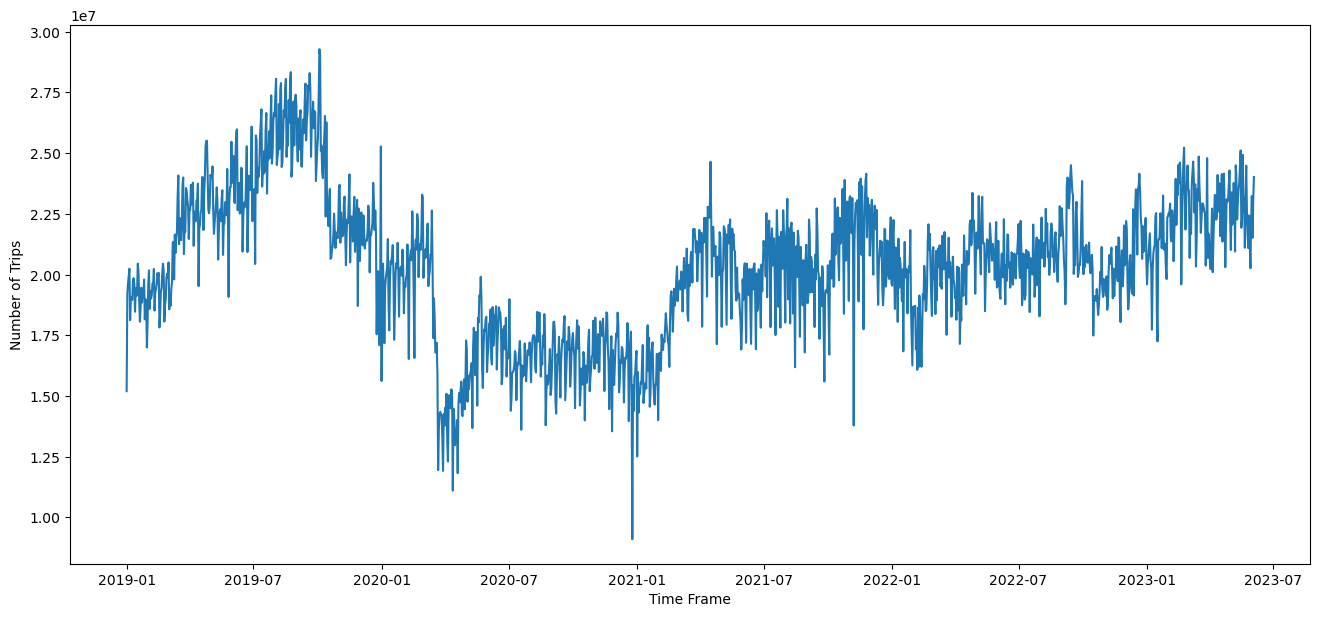

In [21]:
# Plot No of trips in Cook County, IL over time.
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Number of Trips')
ax1.plot(ts)

**DATASET DECOMPOSITION**

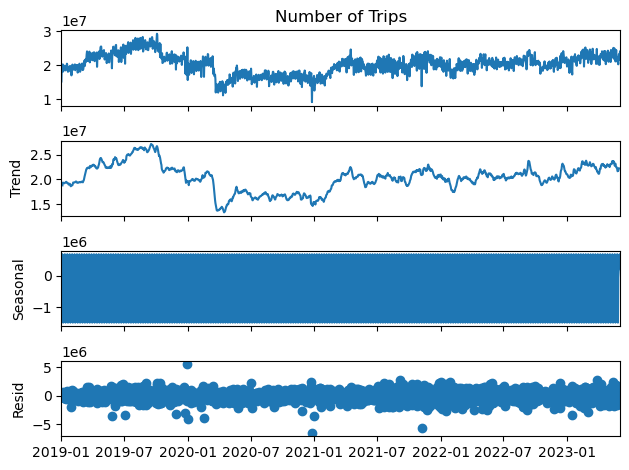

In [23]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig = decomposition.plot()
plt.show()

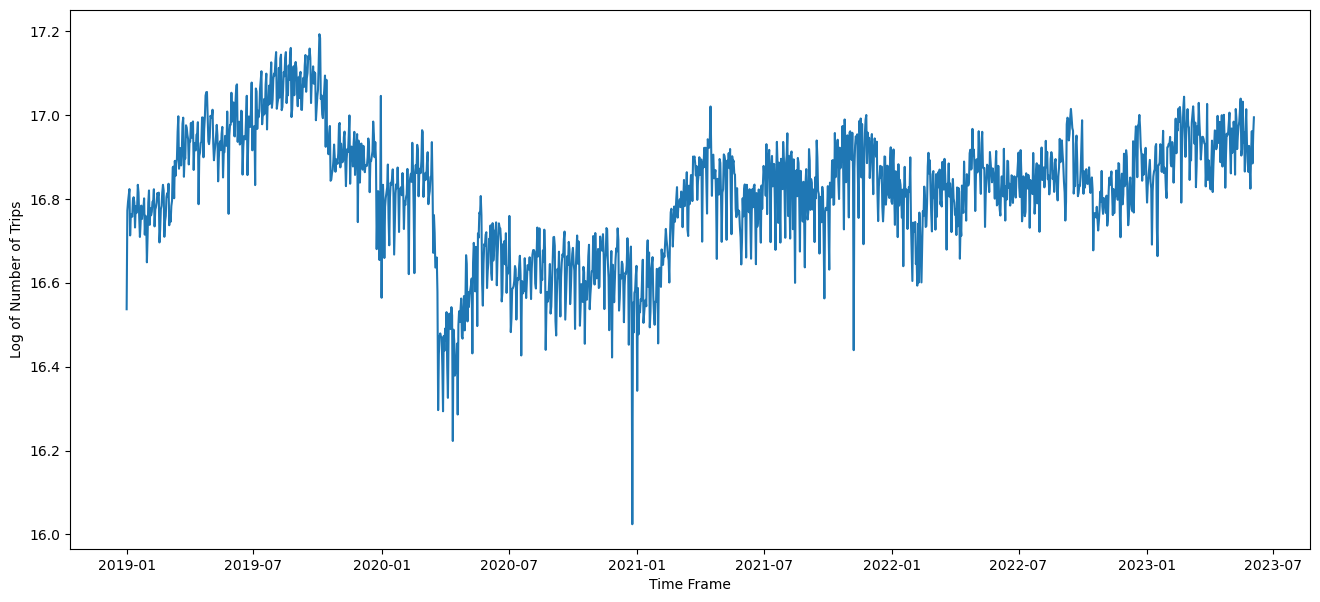

In [24]:
#Log the data
df_log=np.log(ts)

# Plot No of trips in Cook County, IL over time.
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Log of Number of Trips')
ax1.plot(df_log)

In [98]:
# Perform Augmented Dickey-Fuller (ADF) test, to check stationarity.
# ADF Test - null hypothesis - data is non-stationary 
# if p-value < 5% reject null hypothesis
# Result: p-value > 5%, data is not stationary

adfuller_result = adfuller(df_log, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.343900595685421
p-value: 0.1581996589973962
Critial Values:
   1%, -3.434461656404719
Critial Values:
   5%, -2.863356053770622
Critial Values:
   10%, -2.567736831977157


<Axes: xlabel='Date'>

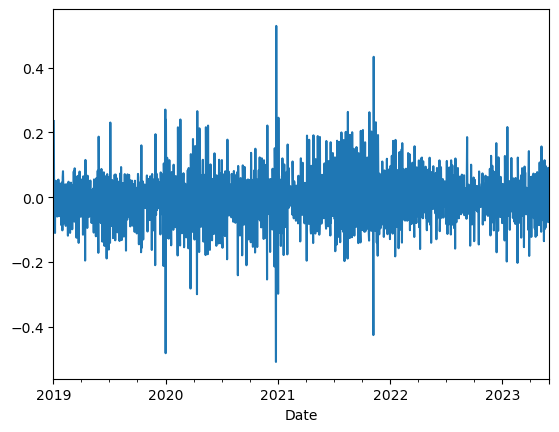

In [99]:
#Differencing
diff_ts=df_log.diff()
diff_ts.plot()

In [100]:
adf1=adfuller(diff_ts.dropna())
print('pvalue of ADF test is :', adf1[1])    #ADF proved data is now stationary after removing the trend

pvalue of ADF test is : 5.6669213359517484e-18


BUILDING MODEL

In [101]:
#Train and Test Data 
#75% train, 25% test
len(diff_ts)

1615

In [102]:
train=diff_ts[:1211]
test=diff_ts[1211:]

In [103]:
# Define the ARIMA model 
model = ARIMA(train, order=(5, 1, 5)).fit()

PREDICTION USING TRAIN DATA, TO COMPARE WITH TEST DATA.

In [104]:
pred=model.predict(start=len(train),end=(len(ts)-1))
pred.head()     # Make prediction based on train data, to compare with test data

2022-04-26   -0.001485
2022-04-27   -0.015080
2022-04-28    0.007635
2022-04-29    0.018658
2022-04-30   -0.023122
Freq: D, Name: predicted_mean, dtype: float64

MODEL EVALUATION ON TEST DATA

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
error=np.sqrt(mean_squared_error(test,pred))
error

0.06217609074838121

In [107]:
test.mean(), np.sqrt(test.var())

(0.0003011583758214685, 0.06351287437858866)

<Axes: xlabel='Date'>

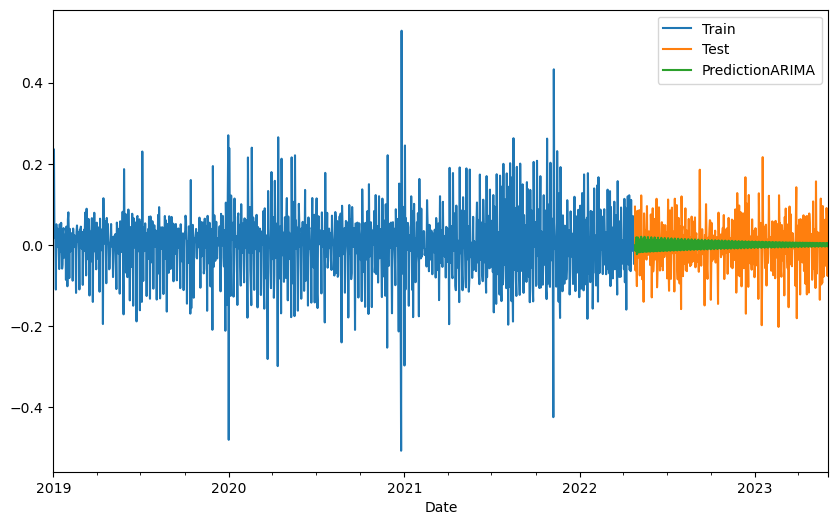

In [108]:
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='PredictionARIMA')

PREDICT FUTURE

In [109]:
final_model=ARIMA(diff_ts,order=(5,1,5)).fit() #build on full dataset

In [110]:
prediction=final_model.predict(len(diff_ts),len(diff_ts)+403)   # prediction for next 1 year

<Axes: xlabel='Date'>

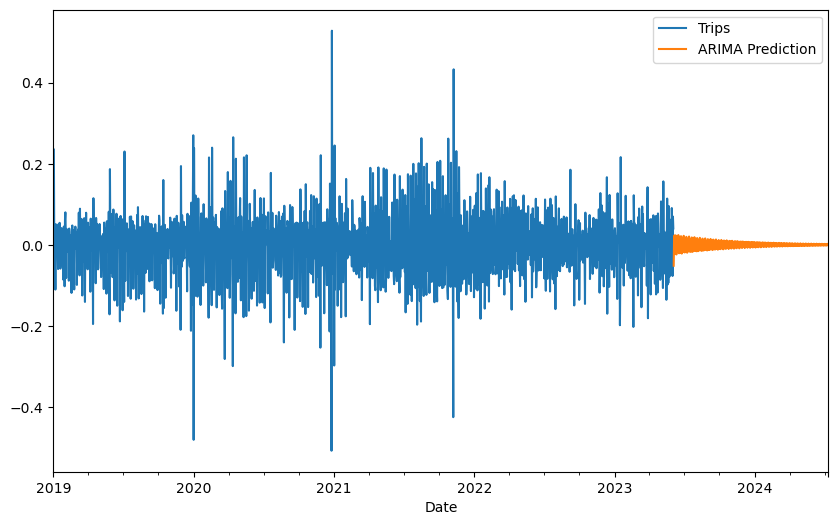

In [111]:
diff_ts.plot(legend=True, label='Trips',figsize=(10,6))
prediction.plot(legend=True, label='ARIMA Prediction')

In [112]:
np.sqrt(mean_squared_error(test,prediction))

0.06532522497643241

SARIMAX MODEL

In [113]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [114]:
sarimax_model=SARIMAX(train,order=(5,1,5),seasonal_order=(5,1,5,7)).fit() #build on full dataset

In [115]:
prediction_sarimax=sarimax_model.predict(start=test.index[0],end=test.index[-1]) 

PLOTTING ARIMA & SARIMAX PREDICTION AGAINST ORIGINAL TEST DATA WITH SARIMAX FUTURE PREDICTION

<Axes: xlabel='Date'>

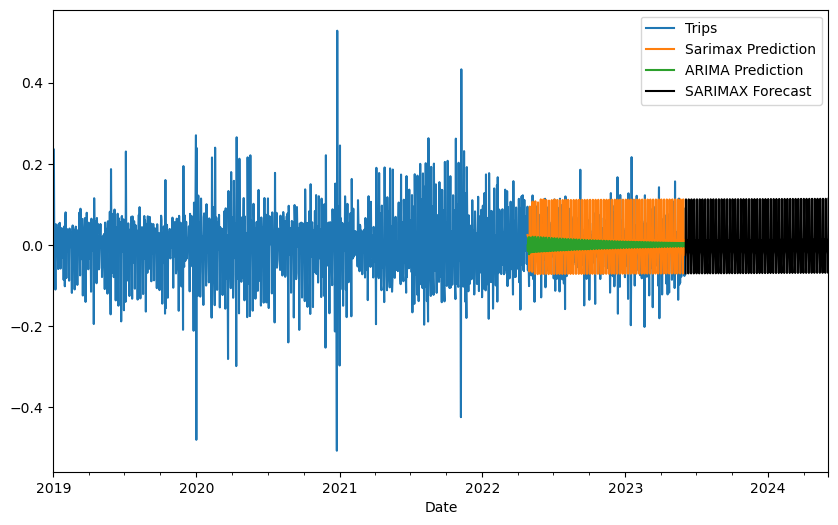

In [116]:

diff_ts.plot(legend=True, label='Trips',figsize=(10,6))
prediction_sarimax.plot(legend=True, label='Sarimax Prediction')
pred.plot(legend=True, label='ARIMA Prediction')
sarimax_model.predict(len(diff_ts),len(diff_ts)+365).plot(legend=True, label='SARIMAX Forecast',color='black') #prediction for next 1 year

In [117]:
np.sqrt(mean_squared_error(test,prediction_sarimax))

0.06254030009128034

GET ARIMA HYPERPARAMETERS p,d,q

In [118]:
import itertools

In [119]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [120]:
pdq_combination=list(itertools.product(p,d,q))

In [121]:
len(pdq_combination)

512

In [122]:
rmse=[]
order1=[]

In [123]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [2]:
results=pd.DataFrame(index=order1,data=rmse, columns=['RMSE'])

NameError: name 'order1' is not defined

In [125]:
# Sorting the DataFrame in descending order by 'RMSE'
results_sorted = results.sort_values(by='RMSE', ascending=False)

# Displaying the sorted DataFrame
print(results_sorted)

PermissionError: [Errno 13] Permission denied: 'ARIMA_Result.csv'